In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('E:\\pythonEverything\\COCOMO-81.csv')

In [2]:
cost_drivers = [
    'rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn',
    'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced'
]

df['EAF'] = df[cost_drivers].prod(axis=1)
df1=pd.get_dummies(df.dev_mode)
df2=pd.concat([df1,df],axis='columns')
df3=df2.drop(['dev_mode','num','rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn',
    'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced'],axis='columns')
df3.head(2)

,embedded,organic,semidetached,loc,actual,EAF
0,True,False,False,113.0,2040.0,2.288115
1,True,False,False,293.0,1600.0,0.842266


In [45]:
# # y=df3.actual
# # X=df3.drop(['actual'],axis='columns')
# # X
# le=['loc','EAF']
# X['effort']=X[le].prod(axis=1)
# # X=X.drop(['loc','EAF'],axis='columns')
# X['LogActual']=np.log1p(df3['actual'])
# # X=X.drop(['LogActual'],axis='columns')
# # y=X.LogActual
# X
# # 

In [3]:
le=['loc','EAF']
df3['effort']=df3[le].prod(axis=1)
df3['LogActual']=np.log1p(df3['actual'])
X=df3.drop(['actual','LogActual'],axis='columns')
y=df3.LogActual
X

,embedded,organic,semidetached,loc,EAF,effort
0,True,False,False,113.0,2.288115,258.556994
1,True,False,False,293.0,0.842266,246.784025
2,False,False,True,132.0,0.346245,45.704357
3,False,True,False,60.0,0.998141,59.888457
4,False,True,False,16.0,0.656169,10.498712
...,...,...,...,...,...,...
58,False,True,False,23.0,0.961608,22.116984
59,False,True,False,6.7,2.125489,14.240775
60,False,True,False,28.0,0.446599,12.504764
61,False,False,True,9.1,1.157497,10.533222


In [6]:
# from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# print("R² Score:", r2_score(y_test, y_pred))
# print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))
print("MAE  : " ,mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print(model.score(X_test,y_test))

R² Score: 0.9027058953997252
MAE  :  0.3896726650610288
RMSE: 0.4929261246131283
0.9027058953997252


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [7]:
model.score(X_test,y_test)

0.9027058953997252

In [31]:
X

,embedded,organic,semidetached,loc,EAF,effort
0,True,False,False,113.0,2.288115,258.556994
1,True,False,False,293.0,0.842266,246.784025
2,False,False,True,132.0,0.346245,45.704357
3,False,True,False,60.0,0.998141,59.888457
4,False,True,False,16.0,0.656169,10.498712
...,...,...,...,...,...,...
58,False,True,False,23.0,0.961608,22.116984
59,False,True,False,6.7,2.125489,14.240775
60,False,True,False,28.0,0.446599,12.504764
61,False,False,True,9.1,1.157497,10.533222


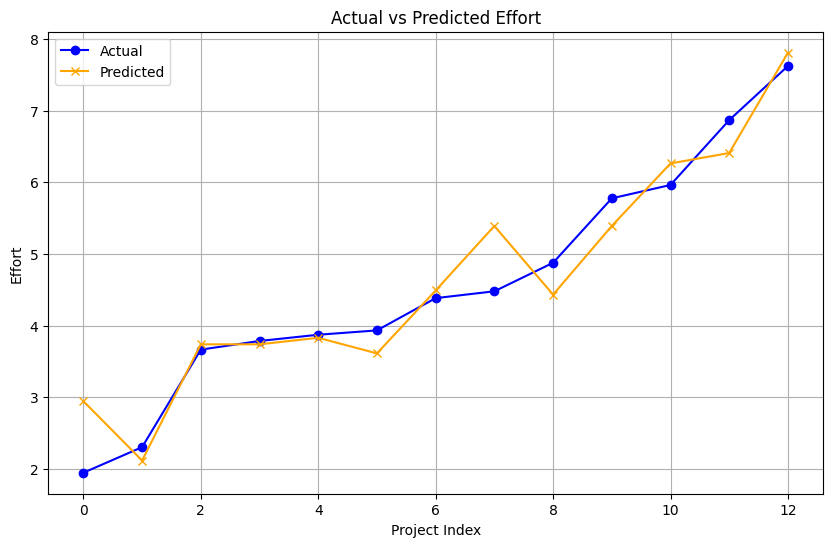

In [12]:
import matplotlib.pyplot as plt

# Optional: Sort values to make the line plot look cleaner
import pandas as pd
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison = comparison.sort_values(by='Actual').reset_index(drop=True)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison['Actual'], label='Actual', color='blue', marker='o')
plt.plot(comparison['Predicted'], label='Predicted', color='orange', marker='x')

plt.title('Actual vs Predicted Effort')
plt.xlabel('Project Index')
plt.ylabel('Effort')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),X,y,cv=cv)

array([0.84478429, 0.90762714, 0.54261185, 0.76803947, 0.76836843])

In [21]:
X.head()

,embedded,organic,semidetached,loc,EAF,effort,LogActual
0,True,False,False,113.0,2.288115,258.556994,7.621195
1,True,False,False,293.0,0.842266,246.784025,7.378384
2,False,False,True,132.0,0.346245,45.704357,5.497168
3,False,True,False,60.0,0.998141,59.888457,5.484797
4,False,True,False,16.0,0.656169,10.498712,3.526361
